In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
src_path = "../Src/"
data_path = "../Measurement/"
cora_path = "../CORA-Z7/"
setup_path = "../Setup/"
import sys
sys.path.insert(1, src_path)
sys.path.insert(2, cora_path)
sys.path.insert(2, setup_path)
sys.path.insert(2, data_path)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from f5288_source import *
import pyvisa as visa
from array_process import *


In [24]:
def S21_HM(rawdatapath,deg_res,theta_min=-60,theta_max=61):
    dfs = pd.DataFrame()
    for theta in range(theta_min,theta_max,deg_res):
        # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
        file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"

        df = pd.read_csv(file_path)
        dfs = pd.concat([dfs, df['S21_LogM']], axis=1)
    dfs_np_rhcp = dfs.to_numpy()
    plt.imshow(np.flip(dfs_np_rhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-50,vmax = -35, extent=[theta_min,theta_max, 0, 8])
    colorbar= plt.colorbar()
    plt.xlabel('Theta(deg)')
    plt.ylabel('Frequency(GHz)')
    plt.title('Heatmap of S21(dB)')
    plt.show()
def S31_HM(rawdatapath,deg_res,theta_min=-60,theta_max=61):
    dfs = pd.DataFrame()
    for theta in range(theta_min,theta_max,deg_res):
    # file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
        # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
        file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
        df = pd.read_csv(file_path)
        dfs = pd.concat([dfs, df['S31_LogM']], axis=1)
    dfs_np_lhcp = dfs.to_numpy()
    print(dfs.shape)
    plt.imshow(np.flip(dfs_np_lhcp, axis = 0), cmap='gnuplot', aspect='auto',vmin=-60,vmax = -35, extent=[theta_min,theta_max, 15, 32])
    colorbar= plt.colorbar()
    plt.xlabel('Theta(deg)')
    plt.ylabel('Frequency(GHz)')
    plt.title('Heatmap of S31(dB)')
    plt.show()
def AR_HM(rawdatapath,deg_res,theta_min,theta_max):
    dfs = pd.DataFrame()
    for theta in range(theta_min,theta_max,deg_res):
        # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
        file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-20.csv"
        df = pd.read_csv(file_path)
        dfs = pd.concat([dfs, df['S21_LogM']], axis=1)
    dfs_np_rhcp = dfs.to_numpy()
    dfs = pd.DataFrame()
    for theta in range(theta_min,theta_max,deg_res):
    # file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
        # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
        file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-20.csv"
        df = pd.read_csv(file_path)
        dfs = pd.concat([dfs, df['S31_LogM']], axis=1)
    dfs_np_lhcp = dfs.to_numpy()
    AR_dis = (abs(10**(dfs_np_lhcp/20)) + abs(10**(dfs_np_rhcp/20))) / (abs(10**(dfs_np_rhcp/20)) - abs(10**(dfs_np_lhcp/20)))
    plt.imshow(np.flip(abs(AR_dis), axis = 0), cmap='gnuplot', aspect='auto',vmin=1,vmax = 3, extent=[theta_min,theta_max, 15, 32])

    plt.xlabel('Theta(deg)')
    plt.ylabel('Frequency(GHz)')
    plt.title('Heatmap of AR')
    colorbar= plt.colorbar()
    plt.show()  

def S21_rect(rawdatapath,fre,deg_res=1,theta_min=-60,theta_max=61):
    
    fre_shift = (fre-0.01)/0.01
    theta_series = []
    dfr_0 = pd.DataFrame()
    dfl_0 = pd.DataFrame()
    dfr_90 = pd.DataFrame()
    dfl_90 = pd.DataFrame()
    for i in range(theta_min,theta_max,deg_res):
        theta_series.append(i)

    for theta in range(theta_min,theta_max,deg_res):
        file_path = f"{rawdatapath}/Phi90_theta_{theta}.csv"
        # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
        # file_path = f"{rawdatapath}/Phi0_theta_{theta}_g-20.csv"
        
        df = pd.read_csv(file_path)
        dfr_90 = dfr_90.append(df['S21_LogM'])

    # for theta in range(theta_min,theta_max,deg_res):
    #     file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-20.csv"
    #     # file_path = f"{rawdatapath}/Phi90_theta_{theta}_g-15.csv"
    #     # file_path = f"{rawdatapath}/Phi0_theta_{theta}_g-20.csv"

    #     df = pd.read_csv(file_path)
    #     dfl_90 = dfl_90.append(df['S31_LogM'])

    # # Plot line 1
    plt.plot(theta_series,dfr_90[fre_shift], label='Co-Pol')

    # # Plot line 2
    # plt.plot(theta_series,dfl_90[fre_shift], label='X-Pol')
    plt.legend(fontsize=9,loc='upper right')
    plt.grid()
    plt.ylim([-80, -20])
    plt.xlim([theta_min,theta_max-1])
    plt.title('S21 vs S31 @ '+str(fre)+'GHz')
    plt.xlabel('Theta(deg)')
    plt.ylabel('Gain(dB)')

def AR_rect(rawdatapath1,theta_mark,fre=29,deg_res=1,theta_min=-60,theta_max=61):
    # rawdatapath1="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/AH4 8x8 farfield_p90t45_20230827011107"
    fre_shift = (fre-15)/0.01
    # deg_res=1
    theta_series = []
    dfr_0 = pd.DataFrame()
    dfl_0 = pd.DataFrame()
    dfr_90 = pd.DataFrame()
    dfl_90 = pd.DataFrame()
    for i in range(theta_min,theta_max,deg_res):
        theta_series.append(i)
    #phi90
    for theta in range(theta_min,theta_max,deg_res):
        file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-20.csv"
        # file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-15.csv"

        df = pd.read_csv(file_path)
        dfr_90 = dfr_90.append(df['S21_LogM'])

    for theta in range(theta_min,theta_max,deg_res):
        file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-20.csv"
        # file_path = f"{rawdatapath1}/Phi90_theta_{theta}_g-15.csv"
    #     file_path = f"{rawdatapath1}/Phi0_theta_{theta}.csv"

        df = pd.read_csv(file_path)
        dfl_90 = dfl_90.append(df['S31_LogM'])


    # dfs_np_rhcp_0 = dfr_0[fre_shift].to_numpy()
    # dfs_np_lhcp_0 = dfl_0[fre_shift].to_numpy()
    dfs_np_rhcp_90 = dfr_90[fre_shift].to_numpy()
    dfs_np_lhcp_90 = dfl_90[fre_shift].to_numpy()

    # AR_0 = (abs(10**(dfs_np_rhcp_0/20) ) + abs(10**(dfs_np_lhcp_0/20) )) / (abs(10**(dfs_np_rhcp_0/20) ) - abs(10**(dfs_np_lhcp_0/20) )) 
    AR_90 = (abs(10**(dfs_np_rhcp_90/20) ) + abs(10**(dfs_np_lhcp_90/20) )) / (abs(10**(dfs_np_rhcp_90/20) ) - abs(10**(dfs_np_lhcp_90/20) )) 
    # fig = plt.figure()
    # ax = fig.add_subplot(111)
    # for i, v in enumerate(AR_90[60]):



    plt.figure()
    plt.plot(theta_series,abs(AR_90), label='AR @$\\Phi$=90, '+str(fre)+'GHz')
    a=(theta_max-theta_min)/deg_res;i=int((theta_mark-theta_min)/deg_res)
    label="("+str(theta_mark)+","+str(round(AR_90[i],2))+")"

    plt.annotate(text=label, xy =(theta_series[i], AR_90[i]), xytext=(theta_series[i]-5, AR_90[i]+1))

    # plt.plot(theta_series,abs(AR_0), label='AR @$\\Phi$=0, '+str(fre)+'GHz')
    plt.ylim([1, 8])
    plt.xlim([theta_min,theta_max-1])
    plt.xlabel('Theta(deg)')
    plt.ylabel('AR')
    plt.legend(fontsize=9,loc='upper center')
    plt.grid()

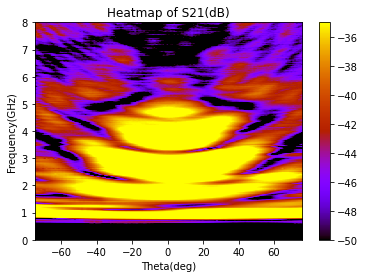

C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_10612/1260665705.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_10612/1260665705.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_10612/1260665705.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\AppData\Local\Temp/ipykernel_10612/1260665705.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr_90 = dfr_90.append(df['S21_LogM'])
C:\Users\TRONFU~1\Ap

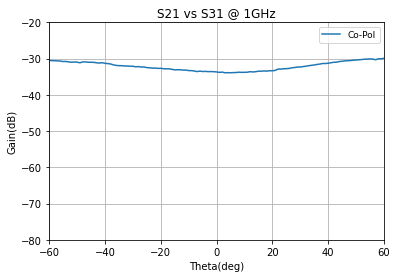

In [37]:
rawdatapath="C:/Users/tronfuture/Downloads/3ea1050014/Measurement/DMW_Jammer_Measurement20230830181144_sensor_v_2"
S21_HM(rawdatapath,deg_res=1,theta_min=-75,theta_max=76)
S21_rect(rawdatapath,1,deg_res=1,theta_min=-60,theta_max=61)